In [1]:
import os
base_dir = 'C:\Users\Ben\Documents\GitHub\plate_reader_code'
os.chdir(base_dir) 

#import sys
from core import od_reader_data_load as odl
from core import od_reader_plot_functions as odp
#from IPython.core.debugger import Tracer
from core import growth_curve_fit as gc_fit
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np
import pandas as pd
#from pandas.tools.plotting import scatter_matrix


In [2]:
%load_ext autoreload
%autoreload 2
%matplotlib notebook

In [3]:
dirname = "C:/Users/Ben/Google Drive/UCSF/ElSamad_Lab/PKA/WetLab/Plate_reader/"

In [4]:
#Convert .xls files to .csv files. 
fnames_xls = ["20161012_KL_NMPP1_doseresp_SDC.xlsx","20161013_SC_NMPP1_doseresp_SDC.xlsx","20161014_KL_NMPP1_doseresp_YPD.xlsx"]
fnames_csv = []
for fname_xls in fnames_xls: 
    fname_csv = odl.xlsx_to_csv(dirname+fname_xls)
    fnames_csv.append(fname_csv)



In [27]:
fname = "20161012_KL_NMPP1_doseresp_SDC.csv"
#Each column is a time point with 96 measurements. Rows are transposed into columns and stacked on top of one another from row A to H.  
ntimes = 94
nrows = 8
ncols = 12
starting_row = 'A'
starting_col = 1

OD_data, time_list = odl.get_OD_data(dirname,fname, ntimes, nrows, ncols,starting_row,starting_col)


#Multiindex object 
layer_names = ['Strain', 'Condition','Replicate']
strains = ['13a','55', '74', '78-1', '78-3']
conditions = ['10uM', '4uM','1uM', '100nM', '10nM','0','DMSO']
experiment_setup = [strains, conditions,['1','2']]      
data_index = pd.MultiIndex.from_product(experiment_setup, names= layer_names)
#Remove missing conditions from data - need to do this if e.g. you don't have the same number of replicates as conditions 
#missing_condition_indices = [7*jj - 2 for jj in [6,8]]+[7*jj - 1 for jj in [6,8]]
#data_index_adjusted = data_index.set_labels([np.delete(label_level,[missing_condition_indices]) for label_level in data_index.labels])

#Data goes in order: (strain[0],condition[0],replicate[0]), (strain[0],condition[0],replicate[1]), (strain[0],condition[1],replicate[0]), (strain[0],condition[1],replicate[1]), ...
wells = ['B2','B7','C2','C7','D2','D7','E2','E7','F2','F7','G2','G7','H2','H7', 
         'B3','B8','C3','C8','D3','D8','E3','E8','F3','F8','G3','G8','H3','H8',
         'B4','B9','C4','C9','D4','D9','E4','E9','F4','F9','G4','G9','H4','H9',
         'B5','B10','C5','C10','D5','D10','E5','E10','F5','F10','G5','G10','H5','H10',
         'B6','B11','C6','C11','D6','D11','E6','E11','F6','F11','G6','G11','H6','H11']

# color_list = ['k','g','b','c']
blank = np.mean(OD_data.data[OD_data.index['A2']])
growth_data = [OD_data.data[OD_data.index[well]]-blank for well in wells ]
# #len(growth_data)
growth_data_df = pd.DataFrame(growth_data, index=data_index, columns = time_list)
growth_data_df.sort_index(inplace = True)
#growth_data_mean = growth_data_df.loc['K.Lac'].groupby(level='Condition').mean().transpose()
#growth_data_std = growth_data_df.loc['K.Lac'].groupby(level = 'Condition').std().transpose()


In [16]:
growth_data_df.loc[(slice(None),'10uM'),:].groupby(level='Strain').mean().transpose()
#growth_data_df.loc[strain].groupby(level='Condition').mean().transpose()

Strain,13a,55,74,78-1,78-3
0.0,0.012438,0.015538,0.016438,0.013538,0.012588
15.0,0.011488,0.014988,0.016738,0.013338,0.012638
30.0,0.011788,0.014338,0.016688,0.013488,0.012888
45.0,0.012138,0.016688,0.016788,0.013688,0.013138
60.0,0.011688,0.019938,0.018738,0.014738,0.014088
75.0,0.014938,0.020638,0.019688,0.014538,0.014088
90.0,0.013588,0.023488,0.020938,0.015588,0.014788
105.0,0.015638,0.022588,0.021238,0.015538,0.015038
120.0,0.014338,0.023138,0.021338,0.016038,0.015688
135.0,0.018238,0.025138,0.024038,0.016688,0.016088


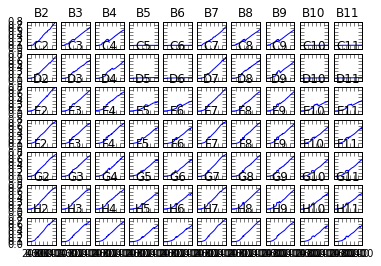

In [50]:
#Plot all wells raw OD
wells = odl.all_wells(['B','C','D','E','F','G','H'],[2,3,4,5,6,7,8,9,10,11])
well_arr = odl.well_array(wells)

fig3 = odp.OD_plot_subplots(OD_data, well_arr, time_list,[])
plt.show()

<IPython.core.display.Javascript object>


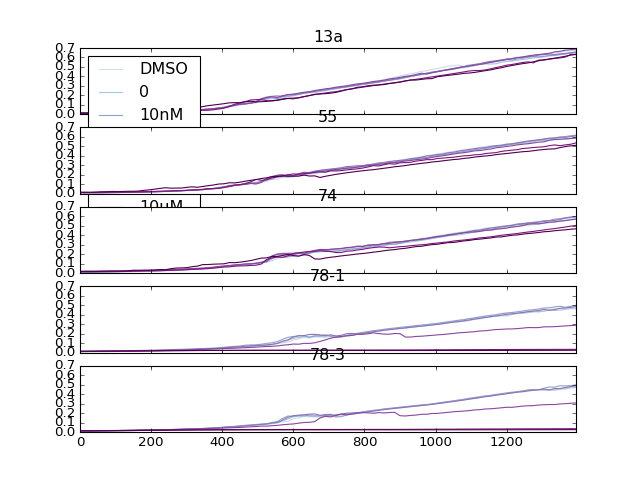

In [7]:
strains = ['13a','55', '74', '78-1', '78-3']
fig1, axarr = plt.subplots(5,sharex = True)

for jj in range(len(strains)):
    strain = strains[jj]
    strain_data = growth_data_df.loc[strain].groupby(level='Condition').mean().transpose()
    strain_data.plot(ax = axarr[jj])
    ax = axarr[jj]
    handles,labels = ax.get_legend_handles_labels()
    lines = ax.get_lines()
    labels_perm = [6,0,2,1,4,5,3]
    colors = cm.BuPu(np.linspace(0.2,1,len(labels_perm)))
    nn = 0
    lines_sorted = []
    for ind in labels_perm:
        line = lines[ind]
        line.set_color(colors[nn])
        lines_sorted.append(line)
        nn = nn+1
    ax.lines = lines_sorted
    if jj == 0: 
        ax.legend(loc='upper left')
    else: 
        ax.legend_.remove()
    ax.set_title(strain)
    ax.set_ylim([0,0.7])
    axarr[jj] = ax
plt.show()

<IPython.core.display.Javascript object>


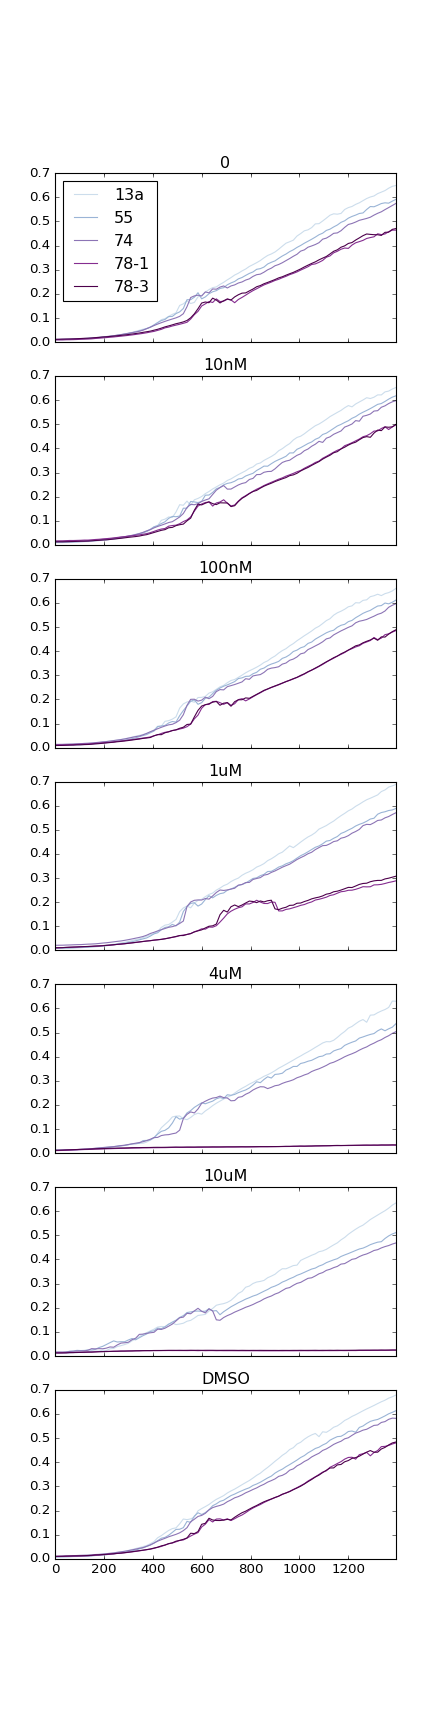

In [29]:
#Plot by condition
conditions = ['0', '10nM', '100nM','1uM','4uM','10uM', 'DMSO']
fig1, axarr = plt.subplots(7,sharex = True)

for jj in range(len(conditions)):
    condition = conditions[jj]
    condition_data = growth_data_df.loc[(slice(None),condition),:].groupby(level='Strain').mean().transpose()
    condition_data.plot(ax = axarr[jj])
    ax = axarr[jj]
    handles,labels = ax.get_legend_handles_labels()
    lines = ax.get_lines()
    labels_perm = [0,1,2,3,4]
    colors = cm.BuPu(np.linspace(0.2,1,len(labels_perm)))
    nn = 0
    lines_sorted = []
    for ind in labels_perm:
        line = lines[ind]
        line.set_color(colors[nn])
        lines_sorted.append(line)
        nn = nn+1
    ax.lines = lines_sorted
    if jj == 0: 
        ax.legend(loc='upper left')
    else: 
        ax.legend_.remove()
    ax.set_title(condition)
    ax.set_ylim([0,0.7])
    axarr[jj] = ax
plt.show()

In [8]:
growth_data_df


0.0       15.0      30.0      45.0      60.0    \
Strain Condition Replicate                                                     
13a    0         1          0.008938  0.009138  0.009338  0.010038  0.010638   
                 2          0.009638  0.012138  0.010338  0.013138  0.011138   
       100nM     1          0.015738  0.016138  0.016438  0.017038  0.017238   
                 2          0.010938  0.010138  0.010438  0.011238  0.011638   
       10nM      1          0.008938  0.008438  0.008838  0.009438  0.009738   
                 2          0.009838  0.010038  0.010038  0.010438  0.010838   
       10uM      1          0.013138  0.011738  0.012138  0.012338  0.011638   
                 2          0.011738  0.011238  0.011438  0.011938  0.011738   
       1uM       1          0.008838  0.009038  0.009838  0.010438  0.011038   
                 2          0.009738  0.009538  0.010038  0.010738  0.011238   
       4uM       1          0.012438  0.013038  0.013238  0.013438  0.013938   
                 2          0.011338  0.011838  0.012038  0.012038  0.012538   
       DMSO      1          0.007838  0.008138  0.008538  0.009238  0.009438   
                 2          0.008438  0.009038  0.009138  0.009838  0.010238   
55     0         1          0.009038  0.009438  0.009438  0.009838  0.010338   
                 2          0.013538  0.013838  0.014238  0.014638  0.015138   
       100nM     1          0.009638  0.009638  0.009538  0.009938  0.010638   
                 2          0.009238  0.009038  0.009538  0.009938  0.010238   
       10nM      1          0.010538  0.010638  0.010638  0.011238  0.011638   
                 2          0.011138  0.011338  0.011438  0.011938  0.012638   
       10uM      1          0.014038  0.013538  0.013838  0.014238  0.019838   
                 2          0.017038  0.016438  0.014838  0.019138  0.020038   
       1uM       1          0.009238  0.009238  0.008938  0.009238  0.009838   
                 2          0.009438  0.009438  0.009538  0.009738  0.010238   
       4uM       1          0.011338  0.011438  0.011438  0.011938  0.012338   
                 2          0.014438  0.014638  0.015038  0.015738  0.016138   
       DMSO      1          0.006438  0.006438  0.006738  0.007338  0.007538   
                 2          0.008038  0.008438  0.008738  0.008938  0.009538   
74     0         1          0.011138  0.010838  0.011638  0.011438  0.011838   
                 2          0.011338  0.011438  0.012238  0.012438  0.012638   
...                              ...       ...       ...       ...       ...   
       DMSO      1          0.012738  0.012938  0.013338  0.014038  0.014438   
                 2          0.008738  0.009138  0.009038  0.009938  0.010438   
78-1   0         1          0.009538  0.009538  0.009738  0.010338  0.010538   
                 2          0.009038  0.009038  0.009138  0.009638  0.009938   
       100nM     1          0.013938  0.013938  0.013738  0.014138  0.014638   
                 2          0.009638  0.009838  0.009638  0.010538  0.010938   
       10nM      1          0.023638  0.023838  0.024038  0.025138  0.026038   
                 2          0.010038  0.010238  0.010338  0.010538  0.010938   
       10uM      1          0.014038  0.014038  0.014238  0.014238  0.014938   
                 2          0.013038  0.012638  0.012738  0.013138  0.014538   
       1uM       1          0.010838  0.011038  0.011538  0.012538  0.013238   
                 2          0.011038  0.011538  0.012338  0.013038  0.014038   
       4uM       1          0.010638  0.010938  0.011538  0.012338  0.012838   
                 2          0.011038  0.011538  0.012138  0.012638  0.013338   
       DMSO      1          0.006938  0.007138  0.007538  0.008238  0.008338   
                 2          0.012038  0.011938  0.012238  0.012738  0.013238   
78-3   0         1          0.013138  0.013638  0.014138  0.014838  0.015238   
                 2          0.

<IPython.core.display.Javascript object>


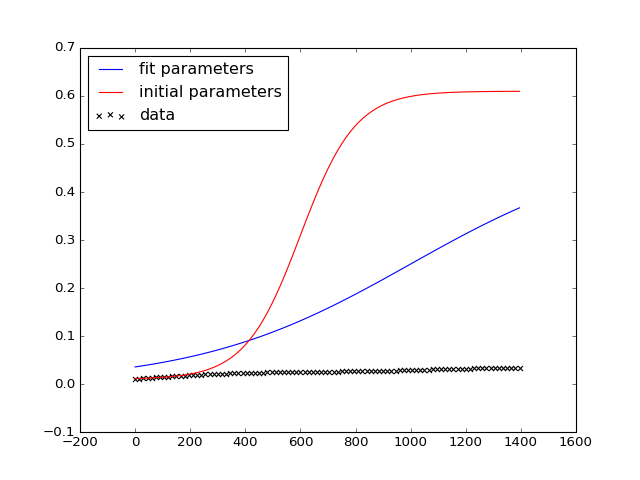

In [126]:
#To visualize fit on one well: 
#Control Strain YPD
jj = 3
kk = 1
xdata = time_list
params0 = np.array([0.6, 0.01, 600.0, 0.01])
#params0 = np.array([0.01, 0.001, 0, 0.01])
#Constrain parameters: 
# L between 0,2
# k between 0,0.02
# x0 between 0,1000
# y0 between 0,0.05
bounds=([0.5,0,0,0], [1.5, .02, 1000,0.05])
#ydata = OD_data.data[OD_data.index['B5']]
strains_data = growth_data_df.groupby(level=['Strain', 'Condition']).mean()
ydata = strains_data.loc[(strains[jj],conditions[kk])]
popt, pcov = gc_fit.growth_curve_fit(xdata,ydata,params0, bounds)
ydata_fit = gc_fit.logistic_function(xdata,popt[0],popt[1],popt[2],popt[3])
ydata_init = gc_fit.logistic_function(xdata,params0[0],params0[1],params0[2],params0[3])

fig6= plt.figure()
ax = fig6.add_subplot(111) 

ax.scatter(xdata,ydata,color = 'k', marker = 'x', label = 'data')
ax.plot(xdata,ydata_fit, color = 'b', label = 'fit parameters')
ax.plot(xdata,ydata_init, color = 'r', label = 'initial parameters')

legend = plt.legend(loc='upper left', fontsize='large')


In [116]:
popt

array([  8.40506822e-02,  -6.59533474e-03,   8.73713455e+03,
        -5.89198309e-02])

<IPython.core.display.Javascript object>


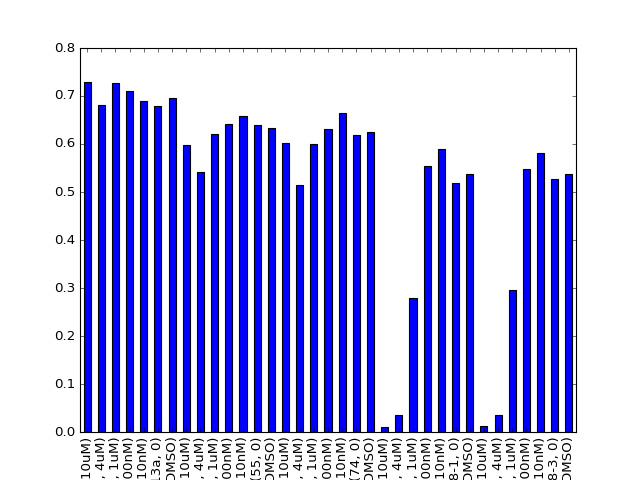

In [125]:
#Fit YPD plots and plot parameters
strains_data = growth_data_df.groupby(level=['Strain', 'Condition']).mean()

param_layer_names = ['Strain', 'Condition']
col_list = ['L','k','x0','y0']
data_index = pd.MultiIndex.from_product([strains,conditions], names= param_layer_names)


layer_size = [len(strains), len(conditions)]
growth_curve_df = pd.DataFrame(np.zeros([np.product(layer_size),len(col_list)]), index = data_index, columns = col_list)

params0 = np.array([0.6, 0.01, 600.0, 0.01])
bounds=([0,0,0,0], [2., .02, 1000,0.05])
xdata = time_list
for jj in range(len(strains)):
    for kk in range(len(conditions)):
        ydata = strains_data.loc[(strains[jj],conditions[kk])]
        popt, pcov = gc_fit.growth_curve_fit(xdata,ydata,params0,bounds)
        growth_curve_df.loc[strains[jj],conditions[kk]]['L'] = popt[0]
        growth_curve_df.loc[strains[jj],conditions[kk]]['k'] = popt[1]
        growth_curve_df.loc[strains[jj],conditions[kk]]['x0'] = popt[2]
        growth_curve_df.loc[strains[jj],conditions[kk]]['y0'] = popt[3]

growth_curve_df
# growth_curve_media_group = growth_curve_df.groupby( level = 'Media')
# growth_curve_df_YP_only = growth_curve_media_group.get_group('YP')

fig, ax = plt.subplots()
#ax_bar_k = growth_curve_df_YP_only['k'].plot(kind='bar');
ax = growth_curve_df['L'].plot(kind='bar')
plt.show()
#fig8.tight_layout()
# fig8.savefig(os.path.abspath('C:\Users\Ben\Google Drive\UCSF\ElSamad_Lab\PKA\WetLab\Plate_reader\\20151027_YP_k.png'))

# fig9 = plt.figure()
# ax_bar_L = growth_curve_df_YP_only['L'].plot(kind='bar');
# fig9.tight_layout()
# fig9.savefig(os.path.abspath('C:\Users\Ben\Google Drive\UCSF\ElSamad_Lab\PKA\WetLab\Plate_reader\\20151027_YP_L.png'))

# fig10 = plt.figure()
# ax_bar_x0 = growth_curve_df_YP_only['x0'].plot(kind='bar');
# fig10.tight_layout()
# fig10.savefig(os.path.abspath('C:\Users\Ben\Google Drive\UCSF\ElSamad_Lab\PKA\WetLab\Plate_reader\\20151027_YP_x0.png'))

# fig11 = plt.figure()
# ax_bar_y0 = growth_curve_df_YP_only['y0'].plot(kind='bar');
# fig11.tight_layout()
# fig11.savefig(os.path.abspath('C:\Users\Ben\Google Drive\UCSF\ElSamad_Lab\PKA\WetLab\Plate_reader\\20151027_YP_y0.png'))

# plt.show()

In [21]:
fname = "20161014_KL_NMPP1_doseresp_YPD.csv"
#Each column is a time point with 96 measurements. Rows are transposed into columns and stacked on top of one another from row A to H.  
ntimes = 94
nrows = 8
ncols = 12
starting_row = 'A'
starting_col = 1

OD_data, time_list = odl.get_OD_data(dirname,fname, ntimes, nrows, ncols,starting_row,starting_col)


#Multiindex object 
layer_names = ['Strain', 'Condition','Replicate']

experiment_setup = [['13a','55', '74', '78-1', '78-3'],['10uM', '4uM','1uM', '100nM', '10nM','0','DMSO'],['1','2']]      
data_index = pd.MultiIndex.from_product(experiment_setup, names= layer_names)
#Remove missing conditions from data - need to do this if e.g. you don't have the same number of replicates as conditions 
#missing_condition_indices = [7*jj - 2 for jj in [6,8]]+[7*jj - 1 for jj in [6,8]]
#data_index_adjusted = data_index.set_labels([np.delete(label_level,[missing_condition_indices]) for label_level in data_index.labels])

#Data goes in order
wells = ['B2','B7','C2','C7','D2','D7','E2','E7','F2','F7','G2','G7','H2','H7', 
         'B3','B8','C3','C8','D3','D8','E3','E8','F3','F8','G3','G8','H3','H8',
         'B4','B9','C4','C9','D4','D9','E4','E9','F4','F9','G4','G9','H4','H9',
         'B5','B10','C5','C10','D5','D10','E5','E10','F5','F10','G5','G10','H5','H10',
         'B6','B11','C6','C11','D6','D11','E6','E11','F6','F11','G6','G11','H6','H11']

# color_list = ['k','g','b','c']
blank = np.mean(OD_data.data[OD_data.index['A2']])
growth_data = [OD_data.data[OD_data.index[well]]-blank for well in wells ]
# #len(growth_data)
growth_data_df = pd.DataFrame(growth_data, index=data_index, columns = time_list)
growth_data_df.sort_index(inplace = True)

<IPython.core.display.Javascript object>


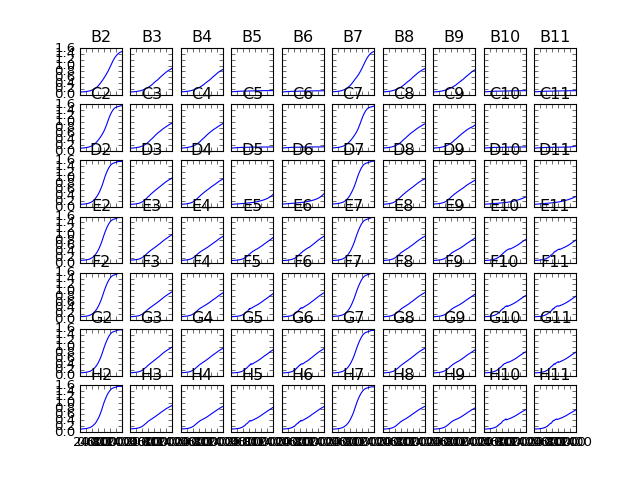

In [22]:
#Plot all wells raw OD
wells = odl.all_wells(['B','C','D','E','F','G','H'],[2,3,4,5,6,7,8,9,10,11])
well_arr = odl.well_array(wells)

fig3 = odp.OD_plot_subplots(OD_data, well_arr, time_list,[])
plt.show()

<IPython.core.display.Javascript object>


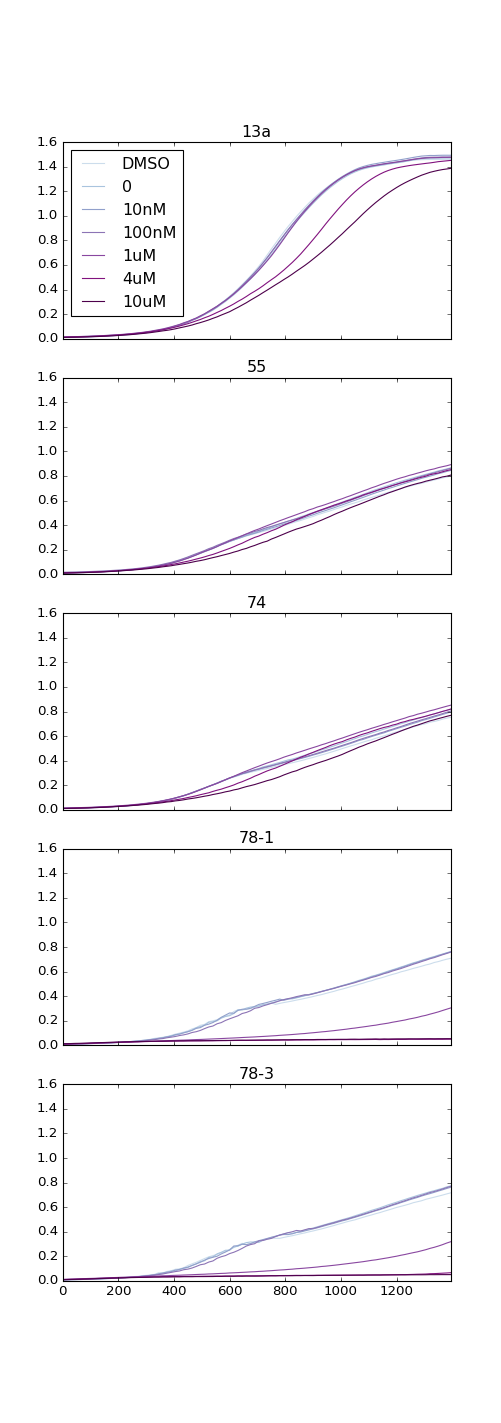

In [229]:
strains = ['13a','55', '74', '78-1', '78-3']
fig1, axarr = plt.subplots(5,sharex = True)

for jj in range(len(strains)):
    strain = strains[jj]
    strain_data = growth_data_df.loc[strain].groupby(level='Condition').mean().transpose()
    strain_data.plot(ax = axarr[jj])
    ax = axarr[jj]
    handles,labels = ax.get_legend_handles_labels()
    lines = ax.get_lines()
    labels_perm = [6,0,2,1,4,5,3]
    colors = cm.BuPu(np.linspace(0.2,1,len(labels_perm)))
    nn = 0
    lines_sorted = []
    for ind in labels_perm:
        line = lines[ind]
        line.set_color(colors[nn])
        lines_sorted.append(line)
        nn = nn+1
    ax.lines = lines_sorted
    if jj == 0: 
        ax.legend(loc='upper left')
    else: 
        ax.legend_.remove()
    ax.set_title(strain)
    ax.set_ylim([0,1.6])
    axarr[jj] = ax
plt.show()

<IPython.core.display.Javascript object>


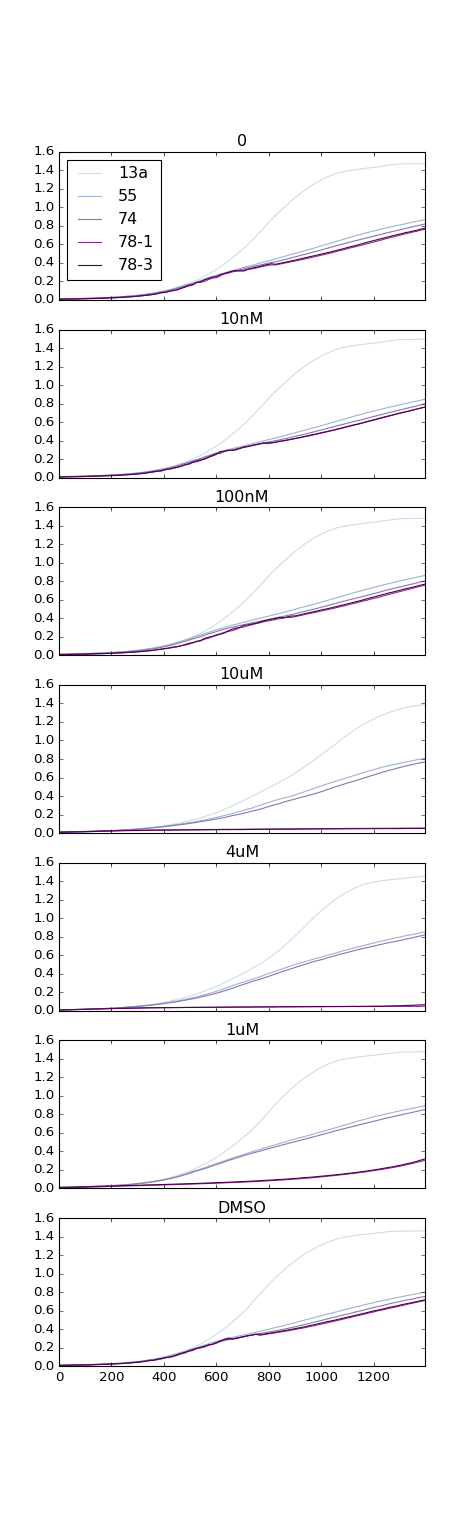

In [25]:
#Plot by condition
conditions = ['0', '10nM', '100nM', '10uM', '4uM','1uM','DMSO']
fig1, axarr = plt.subplots(7,sharex = True)

for jj in range(len(conditions)):
    condition = conditions[jj]
    condition_data = growth_data_df.loc[(slice(None),condition),:].groupby(level='Strain').mean().transpose()
    condition_data.plot(ax = axarr[jj])
    ax = axarr[jj]
    handles,labels = ax.get_legend_handles_labels()
    lines = ax.get_lines()
    labels_perm = [0,1,2,3,4]
    colors = cm.BuPu(np.linspace(0.2,1,len(labels_perm)))
    nn = 0
    lines_sorted = []
    for ind in labels_perm:
        line = lines[ind]
        line.set_color(colors[nn])
        lines_sorted.append(line)
        nn = nn+1
    ax.lines = lines_sorted
    if jj == 0: 
        ax.legend(loc='upper left')
    else: 
        ax.legend_.remove()
    ax.set_title(condition)
    ax.set_ylim([0,1.6])
    axarr[jj] = ax
plt.show()

In [30]:
fname = "20161013_SC_NMPP1_doseresp_SDC.csv"
#Each column is a time point with 96 measurements. Rows are transposed into columns and stacked on top of one another from row A to H.  
ntimes = 88
nrows = 8
ncols = 12
starting_row = 'A'
starting_col = 1

OD_data, time_list = odl.get_OD_data(dirname,fname, ntimes, nrows, ncols,starting_row,starting_col)


#Multiindex object 

layer_names = ['Strain', 'Condition','Replicate']
strains = ['5-41','35', '49', '50', '51', '52']
conditions = ['10uM', '4uM','1uM', '100nM', '10nM','0','DMSO']
replicates = ['1', '2']
experiment_setup = [strains,conditions,replicates]      
data_index = pd.MultiIndex.from_product(experiment_setup, names= layer_names)
#Remove missing conditions from data - need to do this if e.g. you don't have the same number of replicates as conditions 
#49 and 50 only have one replicate
strains_missing_rep = ['49','50']
Nconds = len(conditions)
Nreps = len(replicates)
missing_condition_indices = []
for strain in strains_missing_rep: 
    ind_missing_rep = strains.index(strain)
    missing_condition_indices = missing_condition_indices + range(ind_missing_rep*Nconds*Nreps+1,(ind_missing_rep+1)*Nconds*Nreps-1+2,2)

#A previous experiment used this 
#missing_condition_indices = [7*jj - 2 for jj in [6,8]]+[7*jj - 1 for jj in [6,8]]

data_index_adjusted = data_index.set_labels([np.delete(label_level,[missing_condition_indices]) for label_level in data_index.labels])

data_index_adjusted

#Data goes in order
wells = ['B6','B10','C6','C10','D6','D10','E6','E10','F6','F10','G6','G10','H6','H10', 
         'B7','B11','C7','C11','D7','D11','E7','E11','F7','F11','G7','G11','H7','H11',
         'B2','C2','D2','E2','F2','G2','H2',
         'B3','C3','D3','E3','F3','G3','H3',
         'B4','B8','C4','C8','D4','D8','E4','E8','F4','F8','G4','G8','H4','H8',
         'B5','B9','C5','C9','D5','D9','E5','E9','F5','F9','G5','G9','H5','H9']

# # color_list = ['k','g','b','c']
blank = np.mean(OD_data.data[OD_data.index['A2']])
growth_data = [OD_data.data[OD_data.index[well]]-blank for well in wells ]
# #len(growth_data)
growth_data_df = pd.DataFrame(growth_data, index=data_index_adjusted, columns = time_list)
growth_data_df.sort_index(inplace = True)

In [31]:
layer_names = ['Strain', 'Condition','Replicate']
strains = ['5-41','35', '49', '50', '51', '52']
conditions = ['10uM', '4uM','1uM', '100nM', '10nM','0','DMSO']
replicates = ['1', '2']
strains_missing_rep = ['49','50']
Nconds = len(conditions)
Nreps = len(replicates)
missing_condition_indices = []
for strain in strains_missing_rep: 
    ind_missing_rep = strains.index(strain)
    missing_condition_indices = missing_condition_indices + range(ind_missing_rep*Nconds*Nreps+1,(ind_missing_rep+1)*Nconds*Nreps-1+2,2)
missing_condition_indices

[29, 31, 33, 35, 37, 39, 41, 43, 45, 47, 49, 51, 53, 55]

<IPython.core.display.Javascript object>


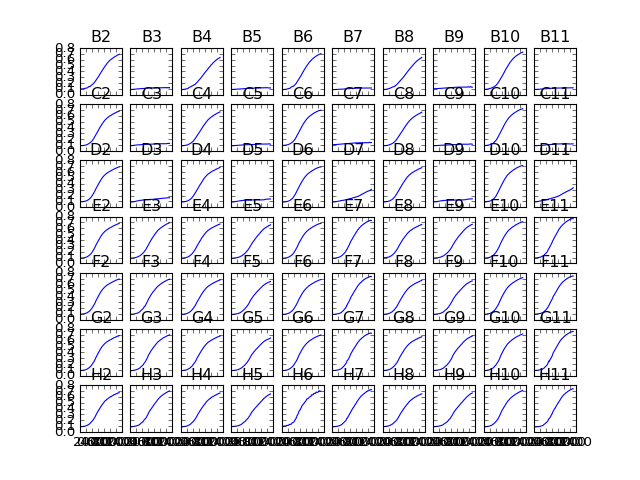

In [11]:
#Plot all wells raw OD
wells = odl.all_wells(['B','C','D','E','F','G','H'],[2,3,4,5,6,7,8,9,10,11])
well_arr = odl.well_array(wells)

fig3 = odp.OD_plot_subplots(OD_data, well_arr, time_list,[])
plt.show()

<IPython.core.display.Javascript object>


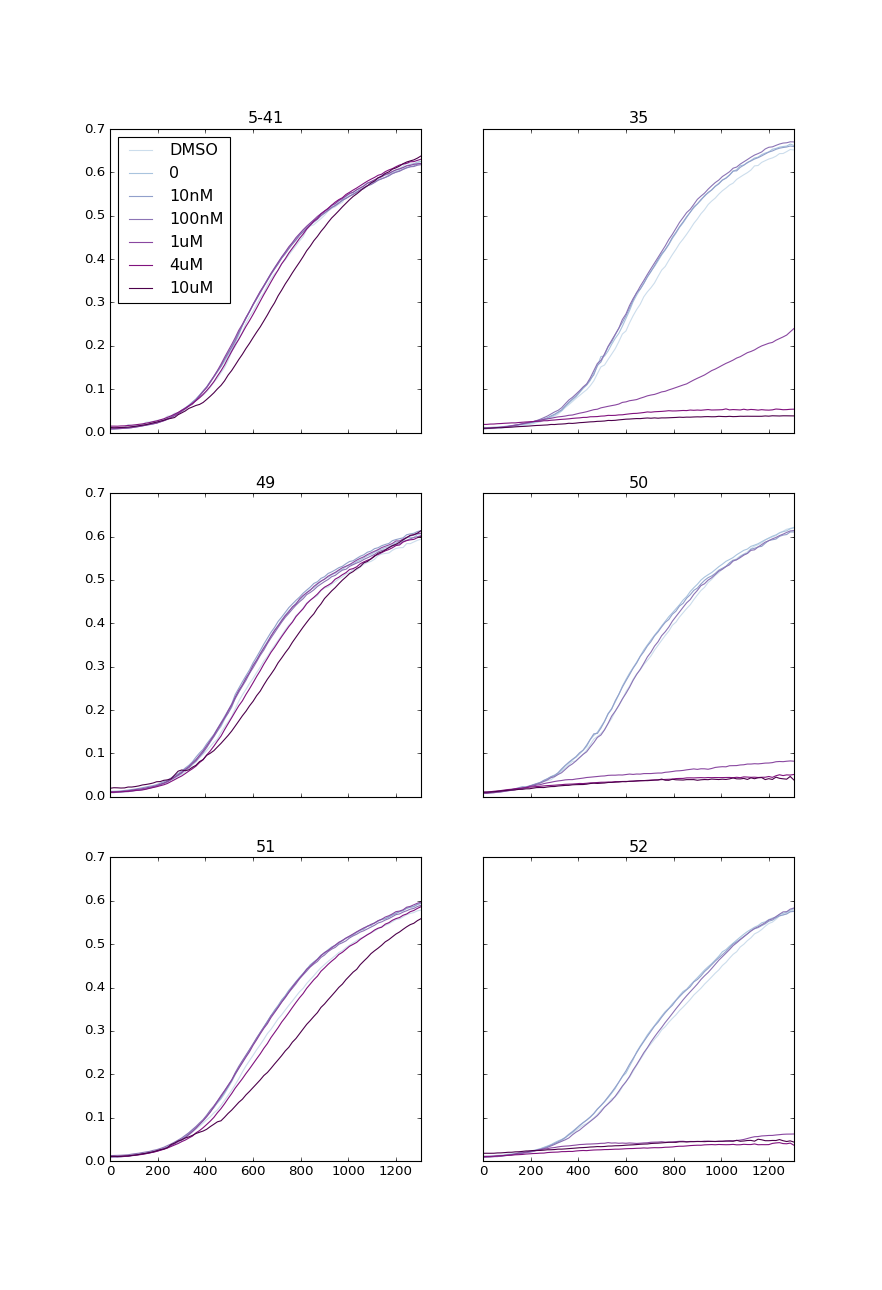

In [54]:
strains = ['5-41','35', '49', '50', '51', '52']
fig1, axarr = plt.subplots(3,2,sharex = True,sharey = True)
for jj in range(len(strains)):
    strain = strains[jj]
    strain_data = growth_data_df.loc[strain].groupby(level='Condition').mean().transpose()
    strain_data.plot(ax =  axarr[int(np.floor(jj/2)), int(np.remainder(jj,2))])
    ax = axarr[int(np.floor(jj/2)), int(np.remainder(jj,2))]
    handles,labels = ax.get_legend_handles_labels()
    lines = ax.get_lines()
    labels_perm = [6,0,2,1,4,5,3]
    colors = cm.BuPu(np.linspace(0.2,1,len(labels_perm)))
    nn = 0
    lines_sorted = []
    for ind in labels_perm:
        line = lines[ind]
        line.set_color(colors[nn])
        lines_sorted.append(line)
        nn = nn+1
    ax.lines = lines_sorted
    if jj == 0: 
        ax.legend(loc='upper left')
    else: 
        ax.legend_.remove()
    ax.set_title(strain)
    ax.set_ylim([0,0.7])
    #axarr[jj] = ax
plt.show()

<IPython.core.display.Javascript object>


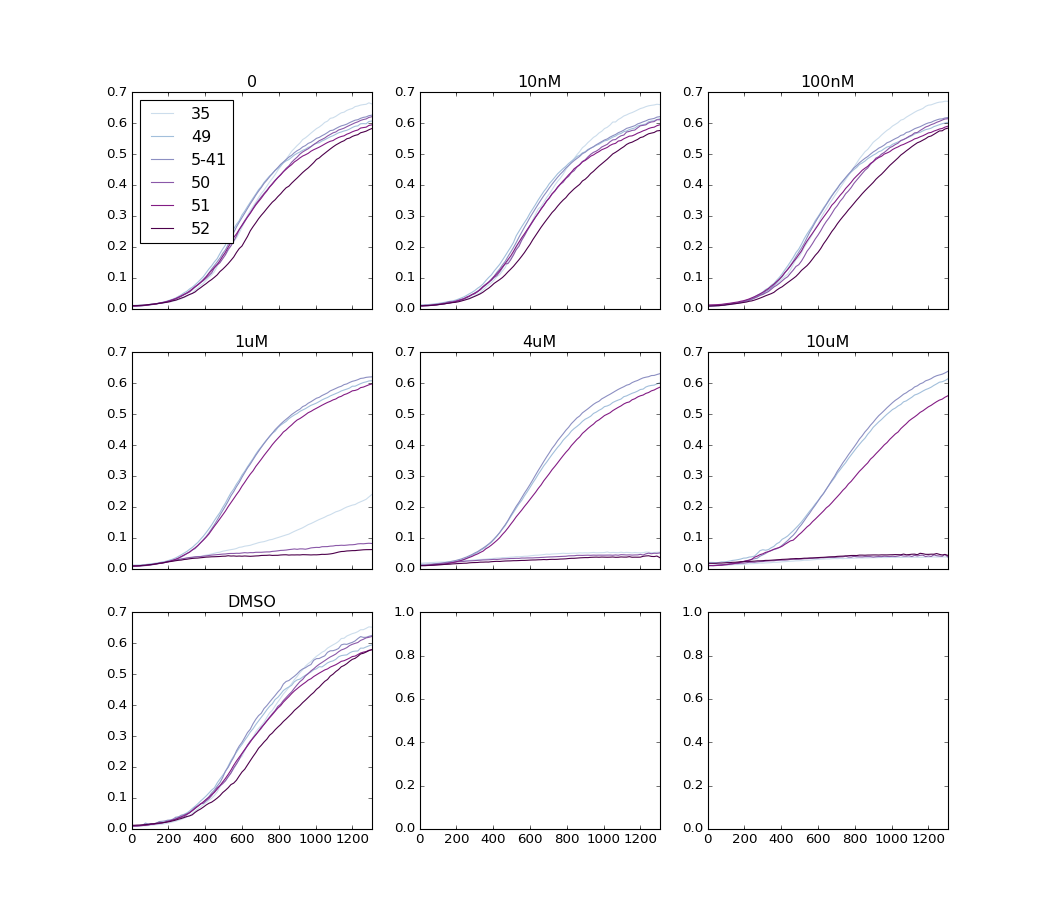

In [36]:
#Plot by condition
conditions = ['0', '10nM', '100nM','1uM','4uM','10uM', 'DMSO']
fig1, axarr = plt.subplots(3,3,sharex = True)

for jj in range(len(conditions)):
    condition = conditions[jj]
    condition_data = growth_data_df.loc[(slice(None),condition),:].groupby(level='Strain').mean().transpose()
    condition_data.plot(ax =  axarr[int(np.floor(jj/3)), int(np.remainder(jj,3))])
    ax = axarr[int(np.floor(jj/3)), int(np.remainder(jj,3))]
    handles,labels = ax.get_legend_handles_labels()
    lines = ax.get_lines()
    labels_perm = [0,1,2,3,4,5]
    colors = cm.BuPu(np.linspace(0.2,1,len(labels_perm)))
    nn = 0
    lines_sorted = []
    for ind in labels_perm:
        line = lines[ind]
        line.set_color(colors[nn])
        lines_sorted.append(line)
        nn = nn+1
    ax.lines = lines_sorted
    if jj == 0: 
        ax.legend(loc='upper left')
    else: 
        ax.legend_.remove()
    ax.set_title(condition)
    ax.set_ylim([0,0.7])
    axarr[int(np.floor(jj/3)), int(np.remainder(jj,3))] = ax
plt.show()

In [46]:
#fgy

































3